In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from astropy.io import fits

In [5]:
cube = fits.open("0_lwsynth_100.0.fits")[0].data
cube.shape

(1536, 1536, 1, 102)

In [6]:
cube = cube[:,:,:,21:]

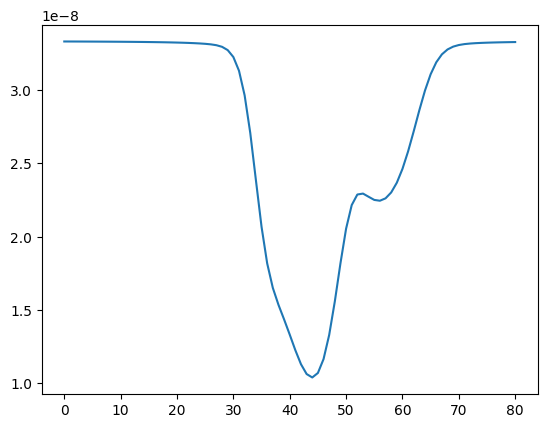

In [7]:
# Example of finding value of the intensity in the center of hte line: 

i = 1212
j = 265

plt.plot(cube[i,j,0])

In [9]:
# Find the location of minimum and fit a parabola aorund neighboring 4 points or so: 
spec = cube[i,j,0]
imin = np.argmin(spec)
print (imin)

44


In [11]:
x = np.arange(5) + imin - 2
y = spec[x]
print (x,y)
a,b,c = np.polyfit(x,y,2)
print (a,b,c)

[42 43 44 45 46] [1.12916779e-08 1.06235974e-08 1.03895293e-08 1.06970925e-08
 1.16414962e-08]
2.690428343993761e-10 -2.3598456255663135e-08 5.278557408670562e-07


In [14]:
x_min = -b / 2 / a
print (x_min)
y_min = a * x_min **2.0 + b * x_min + c 
print (y_min)

43.856318099579646
1.038503876336735e-08


In [19]:
def find_minimum_intensity(spec):

    imin = np.argmin(spec[30:60])+30
    x = np.arange(5) + imin - 2
    y = spec[x]
    a,b,c = np.polyfit(x,y,2)
    x_min = -b / 2 / a
    y_min = a * x_min **2.0 + b * x_min + c
    return x_min, y_min
    

In [20]:
from tqdm import tqdm

In [21]:
v = np.zeros([1536,1536])
I_min = np.zeros([1536,1536])

In [22]:
for i in tqdm(range(0,1536)):
    for j in range(0,1536):

        tt, ttt = find_minimum_intensity(cube[i,j,0])

        v[i,j] = tt
        I_min[i,j] = ttt
        

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 1536/1536 [01:38<00:00, 15.52it/s]


In [23]:
v_los = ((v * 0.005) - 0.28) * 3E8 / 5250.28

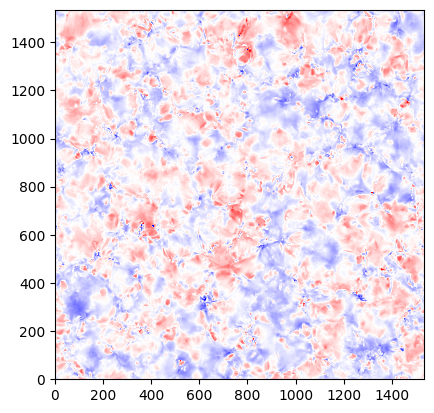

In [26]:
plt.imshow((v.T - np.mean(v))/1E3, origin='lower', cmap='bwr', vmin = -5, vmax=5)

In [30]:
I_qs = np.mean(cube[:,:,0,0])
I_qs

3.80767648387116e-08

In [31]:
cube.shape

(1536, 1536, 1, 81)

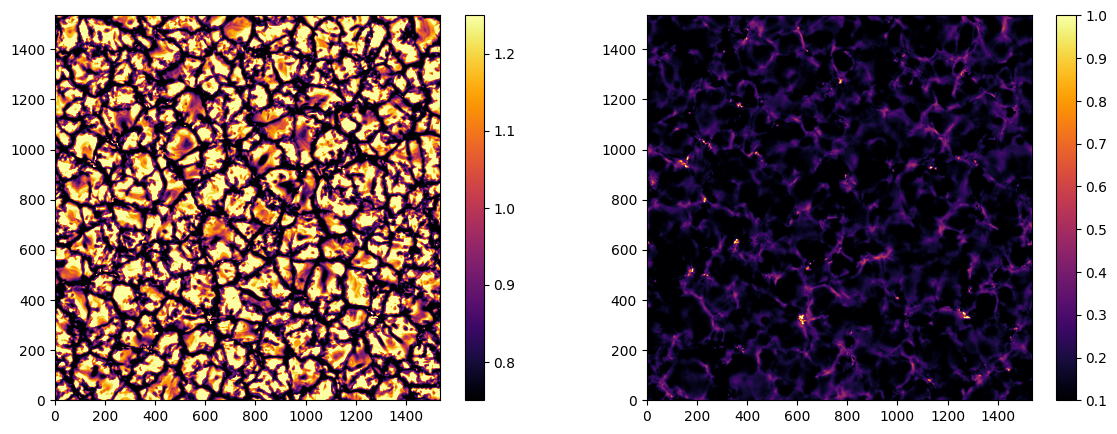

In [42]:
plt.figure(figsize=[14,5])
plt.subplot(121)
plt.imshow(cube[:,:,0,0].T/I_qs, origin = 'lower', cmap = 'inferno', vmin= 0.75, vmax= 1.25)
plt.colorbar()
plt.subplot(122)
plt.imshow(I_min.T/I_qs, origin = 'lower', cmap = 'inferno', vmin= 0.1, vmax= 1)
plt.colorbar()

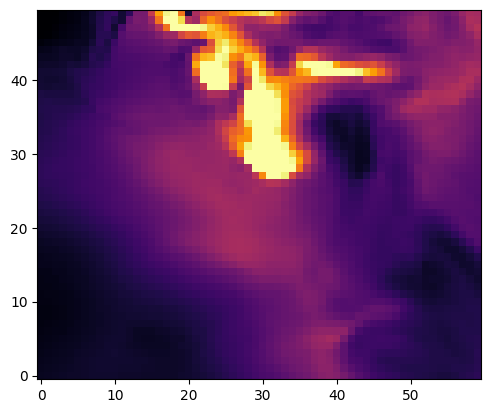

In [36]:
plt.imshow(I_min[590:650, 275:325].T/I_qs, origin = 'lower', cmap = 'inferno', vmin= 0.1, vmax= 1)

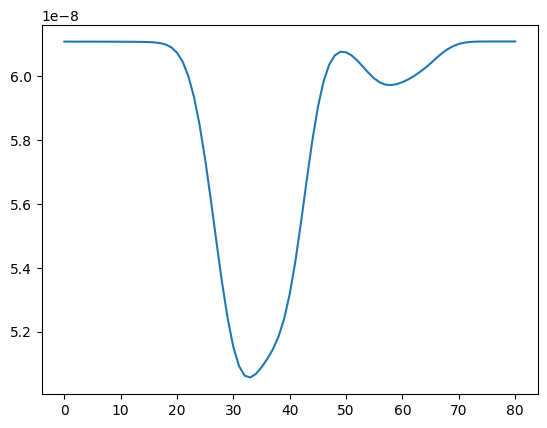

In [37]:
plt.plot(cube[622,305,0])